# Exercise Set 1: Jacob Cardinal Tremblay, Charchit Kumar Sethi, and Sachin Pradeep Etakkepravan Thulicheri

Due: **10:00 11 April 2022**

Discussion: **12:00 22 April 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn
import matplotlib.pyplot as plt
import numpy as np

# 1. Sampling [100 points]

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its
name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example,
respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of
healthcare coverage. The BRFSS Web site (http://www.cdc.gov/brfss) contains a complete description of the survey, including the research
questions that motivate the study and many interesting results derived from the data.

## Download the ASCII data file from the course web site (Name: `cdbrfss1999.zip`)

The file `Codebook99.rtf` contains a detailed explanation of the individual data entries. Use the
Cookbook to understand the data columns that you are working on in this problem.

## Large data

The dataset contains 159989 entries.

**a.** Take a sample of 30000 from this dataset and export it to an ASCII file. Make sure that your method allows to draw more than one sample from the population. **[5 points]**

In [2]:
#Instead exporting to a new file, we create a new dataframe with the sample data. New dataframes are created throughout
#this exercise rather than exporting to new files.
df = pd.read_table("C:/Users/jacob/Desktop/BCGS/Courses/Semester 2/Data Analysis/Exercise 1/cdbrfss1999.csv",sep=',') #Reads in the data and creates a dataframe
randomsample_df = df.sample(n=30000, random_state=1) #Take a random sample of the original data and create a new dataframe for it

C:\Users\jacob\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**b.** Discuss your method to do so. Is your sampling a "good sample" in the sense that it is representative for the larger "population"? **[10 points]**

Random sampling is a good method to produce a "good sample" for this dataset as the dataset is very large. This means that any outliers will have a statistically small impact and that there is a higher probability that the sample is representative of the population. It also does not appear that there is obvious bias in the sample of the population surveyed, therefore random sampling should be appropriate.

## Large columns

Each case in the dataset can have up to 241 variables. Each one of these variables corresponds to a question that was asked in the survey. For example, for **genhlth**, respondents were asked to evaluate their general health, responding either excellent, very good, good, fair or poor. The **exerany** variable indicates whether the respondent exercised in the past month (1) or did not (0). Likewise, **hlthplan** indicates whether the respondent had some form of health coverage (1) or did not (0). The **smoke100** variable indicates whether the respondent had smoked at least 100 cigarettes in her lifetime. The other variables record the respondent’s height in inches (**hti**) and feet (**htf**), **weight** in pounds as well as their desired weight, **wtdesire**, **age** in years, and **sex**.

**a.** Locate the columns corresponding to the variables **genhlth**, **exerany**, **htf**, **hti**, **smoke100**, **weight**, **wtdesire**, **age**, and **sex**.

**b.** Reduce your sample to include only these variables and export it to an ASCII file. **[5 points]**

In [3]:
sample_df = randomsample_df[['GENHLTH','EXERANY','HTF','HTI','SMOKE100','WEIGHT','WTDESIRE','AGE','SEX']]

**c.** How many cases and how many variables are there in your sample? **[5 points]**
- (c) 30,000 cases; 9 variables

The answer is c since every person (row) is considered as a case, and every column corresponds to a variable. We have brought the variabled from 241 to 9, so there are now only 9 variables.

**d.** What type of variable is **genhlth**? **[5 points]**

- (d) categorical, ordinal

genhlth is a categorial variable since it is something which is being categorized and is not something which has an inherent numerical value. This data is also ordinal as it as the "distance" between intervals is not known, and are not clearly defined.

**e.** What type of variable is **weight**? **[5 points]**

- (a) numerical, continuous

weight can be assigned a numerical value, therefore it is a numerical variable. It is also continuous as the weight scale is continous and someone's weight is not a discrete value.

**f.** What type of variable is **smoke100**? **[5 points]**
 
 - (c) categorical (not ordinal)

smoke100 is a categorial variable as the response is categorized and is not a numerical value. It is also not ordinal, since the response is clear between yes or no (Don't know/Not sure and Refused however may ordinal?).

## One Bar chart

Take all **genhlth** entries from your sample and draw a bar chart to visualize how the cases are distributed across the possible categories. **[10 points]**

In [4]:
#Create a variable that represents the number of cases for each unique value in GENHLTH.
dist = sample_df.GENHLTH.value_counts().sort_index()

In [5]:
dist

1    6833
2    9869
3    8540
4    3403
5    1302
7      47
9       6
Name: GENHLTH, dtype: int64

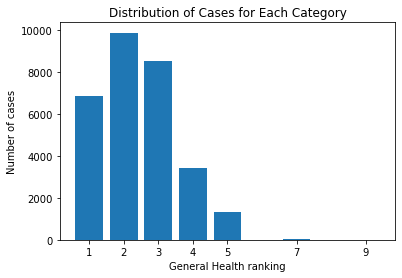

In [6]:
#Create a variable which contains each category.
cat = np.sort(sample_df.GENHLTH.unique())
#Create a bar plot of the number of cases per GENHLTH ranking.
plt.bar(cat, dist)
plt.xticks(cat)
plt.title("Distribution of Cases for Each Category")
plt.xlabel("General Health ranking")
plt.ylabel("Number of cases")
plt.show()

## Two Bar Charts

Combine the **smoke100** with the **genhlth** entries from your sample and draw *two* bar charts, one showing the health of the smokers and a second one showing the health of the non-smokers. **[20 points]**

In [7]:
#Create two new variables to represent the smokers and non-smokers. 
smoke = sample_df[sample_df.SMOKE100 == 1]
nosmoke = sample_df[sample_df.SMOKE100 == 2]

In this case we only consider the responses of 1 and 2 because responses of 3 or 4 do not answer the question. Nonetheless, those who answered 3 or 4 are a very small part of the dataset therefore not including them in our data does not negate the results.

In [8]:
#Create a new variable to represent the GENHLTH distribution for smoker and non-smokers.
smoke_dist = smoke.GENHLTH.value_counts().sort_index()
nosmoke_dist = nosmoke.GENHLTH.value_counts().sort_index()

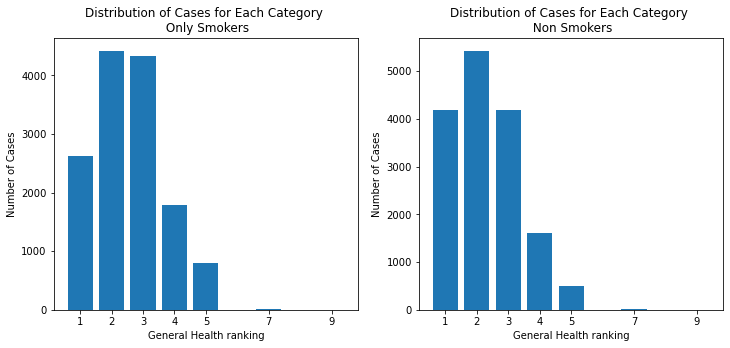

In [9]:
#Plot the distribution of GENHLTH for smokers and non-smokers.
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].bar(cat, smoke_dist)
ax[0].set_xticks(cat)
ax[0].set_title("Distribution of Cases for Each Category \n Only Smokers")
ax[0].set_xlabel("General Health ranking")
ax[0].set_ylabel("Number of Cases")
ax[1].bar(cat, nosmoke_dist)
ax[1].set_xticks(cat)
ax[1].set_title("Distribution of Cases for Each Category \n Non Smokers")
ax[1].set_xlabel("General Health ranking")
ax[1].set_ylabel("Number of Cases")
plt.show()

## BMI

Next let’s consider a new variable **bmi** that doesn’t show up directly in this data set: Body Mass Index (BMI).  **[30 points]**

BMI is a weight to height ratio and can be calculated as.

$$  \mathrm{BMI} = \frac{\mathrm{weight(lb)}}{\mathrm{height(in)}^2} * 703$$

703 is the approximate conversion factor to change units to metric (meters and kilograms)
from imperial (inches and pounds). Compute the bmi for each case in your sample and add it to
the sample (e.g. as additional column). Visualize the distribution of the BMI in your sample.

**ATTENTION**: Remember, that the height was given in feet and inches separately. make sure
to compute the total height in inches!

In [10]:
#Show a exerpt of the dataframe.
sample_df.head()

,GENHLTH,EXERANY,HTF,HTI,SMOKE100,WEIGHT,WTDESIRE,AGE,SEX
143787,2,1.0,5,6,2,140,134.0,19,2
34670,2,NaN,5,8,1,140,NaN,30,2
111610,1,NaN,5,7,1,150,NaN,52,2
153124,3,NaN,5,10,2,204,NaN,51,1
152667,2,NaN,5,4,2,180,NaN,72,2


In [11]:
#Create a new column for the total height in inches 
sample_df['heightin'] = sample_df.HTF * 12 + sample_df.HTI

In [12]:
#Check to make sure the column was added and the values make sense.
sample_df.head()

,GENHLTH,EXERANY,HTF,HTI,SMOKE100,WEIGHT,WTDESIRE,AGE,SEX,heightin
143787,2,1.0,5,6,2,140,134.0,19,2,66
34670,2,NaN,5,8,1,140,NaN,30,2,68
111610,1,NaN,5,7,1,150,NaN,52,2,67
153124,3,NaN,5,10,2,204,NaN,51,1,70
152667,2,NaN,5,4,2,180,NaN,72,2,64


In [13]:
#Calculate the BMI and create a new dataframe.
sample_df['BMI'] = (sample_df.WEIGHT / sample_df.heightin**2) * 703

In [14]:
#Check to make sure the column was added and the values make sense.
sample_df.head()

,GENHLTH,EXERANY,HTF,HTI,SMOKE100,WEIGHT,WTDESIRE,AGE,SEX,heightin,BMI
143787,2,1.0,5,6,2,140,134.0,19,2,66,22.594123
34670,2,NaN,5,8,1,140,NaN,30,2,68,21.284602
111610,1,NaN,5,7,1,150,NaN,52,2,67,23.490755
153124,3,NaN,5,10,2,204,NaN,51,1,70,29.267755
152667,2,NaN,5,4,2,180,NaN,72,2,64,30.893555


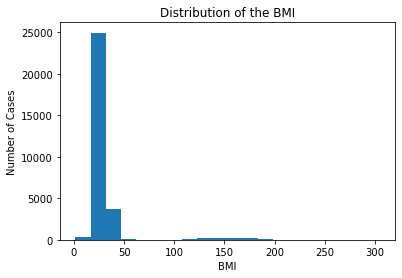

In [15]:
#Plot the distribution of BMI.
plt.hist(sample_df.BMI, bins=20)
plt.title('Distribution of the BMI')
plt.xlabel('BMI')
plt.ylabel('Number of Cases')
plt.show()

Below we investigate the outliers in the BMI. We can see that there exists some bad data (especially in the weight column). In order to better visualise the distribution, we will also plot the distribution for BMI under 100.

In [16]:
#Check to see what the dataframe looks like for the outliers (notice the values in the weight column).
sample_df[sample_df.BMI>100]

,GENHLTH,EXERANY,HTF,HTI,SMOKE100,WEIGHT,WTDESIRE,AGE,SEX,heightin,BMI
125238,2,NaN,5,4,2,777,NaN,30,2,64,133.357178
151999,2,NaN,5,0,2,777,NaN,7,2,60,151.730833
41722,3,NaN,5,3,2,777,NaN,43,2,63,137.624339
6870,3,NaN,5,6,1,999,NaN,51,2,66,161.225207
45785,3,NaN,5,4,1,999,NaN,55,2,64,171.459229
...,...,...,...,...,...,...,...,...,...,...,...
71479,2,1.0,5,2,2,999,NaN,44,2,62,182.699532
89276,5,2.0,5,2,1,999,NaN,67,2,62,182.699532
79691,3,NaN,5,7,1,999,NaN,9,2,67,156.448429
18108,2,NaN,5,4,2,999,NaN,9,2,64,171.459229


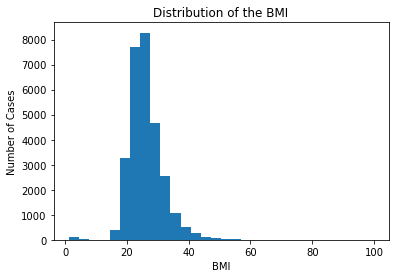

In [17]:
#Plot the distribution of BMI under 100.
plt.hist(sample_df[sample_df.BMI<100].BMI, bins=30)
plt.title('Distribution of the BMI')
plt.xlabel('BMI')
plt.ylabel('Number of Cases')
plt.show()

Here we can clearly see the distribution.